In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [24]:
RegNo = "21BBS0166"
data = {
    'Income': ['<30', '30-70', '30-70', '30-70', '30-70', '30-70', '>70', '>70', '<30', '30-70', '30-70', '30-70'],
    'Criminal Record': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes'],
    'EXP': ['1-5', '1', '1', '1-5', '>5', '1-5', '>5', '>5', '1-5', '1-5', '1-5', '>5'],
    'Loan Approved': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)

In [25]:
print(f"{RegNo} - Original Data:\n", df)

21BBS0166 - Original Data:
    Income Criminal Record  EXP Loan Approved
0     <30              No  1-5           Yes
1   30-70             Yes    1            No
2   30-70              No    1            No
3   30-70             Yes  1-5           Yes
4   30-70              No   >5           Yes
5   30-70             Yes  1-5            No
6     >70             Yes   >5           Yes
7     >70              No   >5            No
8     <30             Yes  1-5            No
9   30-70              No  1-5           Yes
10  30-70              No  1-5            No
11  30-70             Yes   >5           Yes


In [26]:
le_income = LabelEncoder()
le_criminal = LabelEncoder()
le_exp = LabelEncoder()
le_loan = LabelEncoder()


In [27]:
df['Income_encoded'] = le_income.fit_transform(df['Income'])
df['Criminal_Record_encoded'] = le_criminal.fit_transform(df['Criminal Record'])
df['EXP_encoded'] = le_exp.fit_transform(df['EXP'])
df['Loan_Approved_encoded'] = le_loan.fit_transform(df['Loan Approved'])

In [28]:
print(f"\n{RegNo} - Data with Encoded Values:\n", df)


21BBS0166 - Data with Encoded Values:
    Income Criminal Record  EXP Loan Approved  Income_encoded  \
0     <30              No  1-5           Yes               1   
1   30-70             Yes    1            No               0   
2   30-70              No    1            No               0   
3   30-70             Yes  1-5           Yes               0   
4   30-70              No   >5           Yes               0   
5   30-70             Yes  1-5            No               0   
6     >70             Yes   >5           Yes               2   
7     >70              No   >5            No               2   
8     <30             Yes  1-5            No               1   
9   30-70              No  1-5           Yes               0   
10  30-70              No  1-5            No               0   
11  30-70             Yes   >5           Yes               0   

    Criminal_Record_encoded  EXP_encoded  Loan_Approved_encoded  
0                         0            1                     

In [29]:
X = df[['Income_encoded', 'Criminal_Record_encoded', 'EXP_encoded']]
y = df['Loan_Approved_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
knn_loan = KNeighborsClassifier(n_neighbors=3)
knn_loan.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
# Predicting for the given case: Income = 1 (30-70), Criminal Record = 1 (Yes), EXP = 2 (>5)
case = pd.DataFrame([[1, 1, 2]], columns=['Income_encoded', 'Criminal_Record_encoded', 'EXP_encoded'])
prediction = knn_loan.predict(case)
predicted_label = le_loan.inverse_transform(prediction)[0]
print(f"\n{RegNo} - Predicted Loan Approval for case: {predicted_label}")



21BBS0166 - Predicted Loan Approval for case: Yes


In [35]:
predictions_test = knn_loan.predict(X_test)
# Model evaluation with zero_division set to 1
print("\nResults:\n---------------------------------------------")
print(f"{RegNo} - Model Accuracy: {accuracy_score(y_test, predictions_test):.2f}")
print("\nClassification Report:\n", classification_report(y_test, predictions_test, target_names=le_loan.classes_, zero_division=1))



Results:
---------------------------------------------
21BBS0166 - Model Accuracy: 0.33

Classification Report:
               precision    recall  f1-score   support

          No       0.33      1.00      0.50         1
         Yes       1.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.67      0.50      0.25         3
weighted avg       0.78      0.33      0.17         3



<ipython-input-38-b0930128c461>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=le_loan.inverse_transform(df['Loan_Approved_encoded']), data=df, palette='Set2', hue=None)


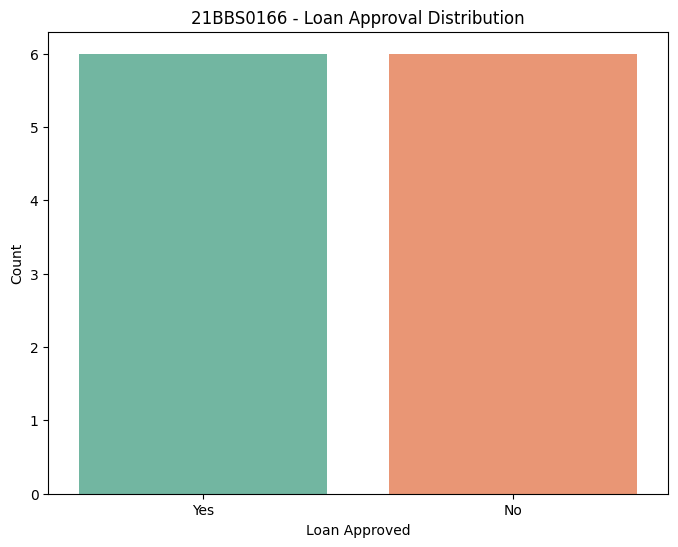

In [38]:
# Visualization with updated hue parameter to prevent warning
plt.figure(figsize=(8, 6))
sns.countplot(x=le_loan.inverse_transform(df['Loan_Approved_encoded']), data=df, palette='Set2', hue=None)
plt.title(f'{RegNo} - Loan Approval Distribution')
plt.xlabel('Loan Approved')
plt.ylabel('Count')
plt.show()
